In [1]:
from glob import glob
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append("../../tools")
from plot_tools import plot_uv_map,plot_map_zoom
import xarray as xr
import matplotlib.pyplot as plt
import pickle
import gzip
import numpy
import netCDF4
import datetime
import os
from typing import Optional, Tuple

from scipy import stats


In [3]:
year = 2010
filenames_drifters = sorted(glob(f'/Odyssey/public/drifters/cmems/drifter_*_{year}.nc'))
ds_drifter = xr.open_mfdataset(filenames_drifters, combine='nested', concat_dim='date')
year_ds_drifter = ds_drifter.sel(date=ds_drifter["date.year"] == year)
year_ds_drifter = year_ds_drifter.compute()
year_ds_drifter_filtred = year_ds_drifter.where(year_ds_drifter['ums'] < 1000, drop=True)



In [5]:
year_ds_drifter_filtred

<xarray.Dataset> Size: 82MB
Dimensions:         (date: 2049006)
Coordinates:
  * date            (date) datetime64[ns] 16MB 2010-01-01 ... 2010-12-31T21:0...
Data variables:
    index_time_gcp  (date) float64 16MB 0.0 1.0 2.0 3.0 ... 185.0 186.0 187.0
    lon             (date) float32 8MB -24.22 -24.19 -24.19 ... 113.7 113.7
    lat             (date) float32 8MB 27.88 27.88 27.87 ... -59.44 -59.44
    ums             (date) float64 16MB 0.241 0.118 -0.018 ... 0.16 0.209 0.254
    vms             (date) float64 16MB -0.067 -0.087 -0.103 ... 0.015 -0.015
Attributes:
    cdm_data_type:                 Trajectory
    idf_version:                   1.0
    idf_granule_id:                drifter_13515_2010.nc
    time_coverage_start:           2010-01-01T00:00:00.000000Z
    time_coverage_end:             2010-03-14T09:00:00.000000Z
    idf_subsampling_factor:        0
    idf_spatial_resolution:        10000000.0
    idf_spatial_resolution_units:  m
    processing_software:           
    netcdf_version_id:             4.7.4 of Oct 31 2021 02:46:37 $
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...

In [4]:
year = 2010
filenames_drifters = sorted(glob(f'/Odyssey/public/drifters/aoml/drifter_*_{year}.nc'))
ds_drifter_aoml = xr.open_mfdataset(filenames_drifters, combine='nested', concat_dim='date')
ds_drifter_aoml = ds_drifter_aoml.sel(date=ds_drifter_aoml["date.year"] == year)
ds_drifter_aoml = ds_drifter_aoml.compute()
ds_drifter_aoml = ds_drifter_aoml.where(ds_drifter_aoml['ums'] < 1000, drop=True)


In [8]:
ds_concat = xr.concat([year_ds_drifter_filtred, ds_drifter_aoml], dim="date")

In [9]:
ds_concat

<xarray.Dataset> Size: 217MB
Dimensions:         (date: 5415887)
Coordinates:
  * date            (date) datetime64[ns] 43MB 2010-01-01 ... 2010-12-21T23:0...
Data variables:
    index_time_gcp  (date) float64 43MB 0.0 1.0 2.0 3.0 ... 387.0 388.0 389.0
    lon             (date) float32 22MB -24.22 -24.19 -24.19 ... 78.37 78.38
    lat             (date) float32 22MB 27.88 27.88 27.87 ... -63.23 -63.23
    ums             (date) float64 43MB 0.241 0.118 -0.018 ... 0.126 0.1241
    vms             (date) float64 43MB -0.067 -0.087 -0.103 ... 0.0905 0.0891
Attributes:
    cdm_data_type:                 Trajectory
    idf_version:                   1.0
    idf_granule_id:                drifter_13515_2010.nc
    time_coverage_start:           2010-01-01T00:00:00.000000Z
    time_coverage_end:             2010-03-14T09:00:00.000000Z
    idf_subsampling_factor:        0
    idf_spatial_resolution:        10000000.0
    idf_spatial_resolution_units:  m
    processing_software:           
    netcdf_version_id:             4.7.4 of Oct 31 2021 02:46:37 $
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...

In [10]:
lon_bins = np.linspace(-180.125, 179.916672 + 0.125, 1441)
lat_bins = np.linspace(-80.125, 90.125, 680)

lon = (lon_bins[1:] + lon_bins[:-1]) / 2
lat = (lat_bins[1:] + lat_bins[:-1]) / 2


In [11]:
# Make daily bin map with u, v mean
day_ds_drifter = ds_concat.sel(date = "2010-02-22")

In [12]:
day_ds_drifter.ums.values.shape[0]

8848

In [13]:
test = np.empty((lon.shape[0],lat.shape[0]))
test[:] = np.nan

In [15]:
# Make daily bin map with u, v mean
day_ds_drifter = ds_concat.sel(date = "2010-01-10")
statistic,x_edge,y_edge,binnumber = stats.binned_statistic_2d(day_ds_drifter.lon.values, day_ds_drifter.lat.values, day_ds_drifter.ums.values, 'mean', bins=[lon_bins, lat_bins])

In [16]:
statistic.shape

(1440, 679)

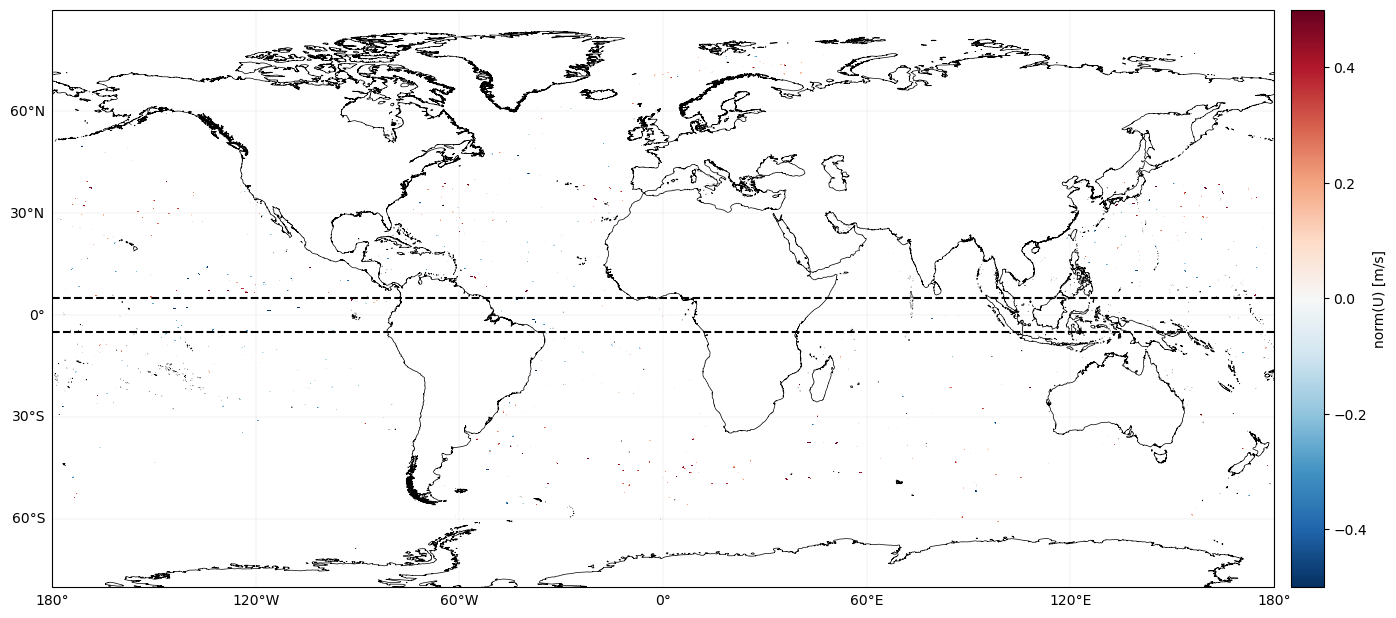

In [17]:
plot_uv_map(statistic.T,lon,lat,vmin=-0.5,vmax=0.5)

In [ ]:
from datetime import datetime, timedelta

lon_bins = np.linspace(-180.125, 179.916672 + 0.125, 1441)
lat_bins = np.linspace(-80.125, 90.125, 680)

lon = (lon_bins[1:] + lon_bins[:-1]) / 2
lat = (lat_bins[1:] + lat_bins[:-1]) / 2

start_date = datetime(2010, 1, 1)
#end_date = datetime(2019, 1, 1)
end_date = datetime(2010, 1, 3)

current_date = start_date
time_index = 0
year = 0

u_drifter_list =[]
v_drifter_list =[]

In [3]:
while current_date < end_date:
        
        check_year = current_date.year
        if check_year != year:
                print(check_year)
                year = check_year
                filenames_drifters = sorted(glob(f'/Odyssey/private/t22picar/data/drifters/cmems/drifter_*_{year}.nc'))
                ds_drifter = xr.open_mfdataset(filenames_drifters, combine='nested', concat_dim='date')
                ds_drifter = ds_drifter.sel(date=ds_drifter["date.year"] == year)
                ds_drifter = ds_drifter.compute()
                ds_drifter = ds_drifter.where(ds_drifter['ums'] < 1000, drop=True)
                ds_drifter = ds_drifter.where(ds_drifter['vms'] < 1000, drop=True) 

        # Make daily bin map with u, v mean
        day_ds_drifter = ds_drifter.sel(date = current_date)
        u_drifter,x_edge,y_edge,binnumber = stats.binned_statistic_2d(day_ds_drifter.lon.values, day_ds_drifter.lat.values, day_ds_drifter.ums.values, 'mean', bins=[lon_bins, lat_bins])
        v_drifter,x_edge,y_edge,binnumber = stats.binned_statistic_2d(day_ds_drifter.lon.values, day_ds_drifter.lat.values, day_ds_drifter.vms.values, 'mean', bins=[lon_bins, lat_bins])

        # Créer un DataArray pour "u"
        u_drifter_xr = xr.DataArray(
        u_drifter.T,
        dims=("lat", "lon"),
        coords={

                "lat": lat,
                "lon": lon,
        },
        name="u_drifter"
        ).expand_dims(time=[current_date])

        # Créer un DataArray pour "u"
        v_drifter_xr = xr.DataArray(
        v_drifter.T,
        dims=("lat", "lon"),
        coords={

                "lat": lat,
                "lon": lon,
        },
        name="v_drifter"
        ).expand_dims(time=[current_date])

        u_drifter_list.append(u_drifter_xr)
        v_drifter_list.append(v_drifter_xr)

        current_date += timedelta(days=1)  # Ajoute 1 an (approximation)
        time_index += 1

2010


In [7]:
# Concaténer tous les DataArrays le long de la dimension "time"
u_drifter = xr.concat(u_drifter_list, dim="time")
v_drifter = xr.concat(v_drifter_list, dim="time")

In [8]:

# Créer le Dataset final
ds = xr.Dataset({"u_drifter": u_drifter, "v_drifter": v_drifter})

print("Saving...")
save_file=f"/Odyssey/private/t22picar/data/drifters/daily_uv/drifters_uv_15m_4th.nc"

# Sauvegarder le DataArray en fichier NetCDF
ds.to_netcdf(save_file)

Saving...


In [78]:
save_file=f"/Odyssey/private/t22picar/data/drifters/daily_uv/drifters_uv_15m_4th.nc"

res_data = xr.open_dataset(save_file)
res_data

<xarray.Dataset> Size: 51GB
Dimensions:    (time: 3287, lat: 679, lon: 1440)
Coordinates:
  * time       (time) datetime64[ns] 26kB 2010-01-01 2010-01-02 ... 2018-12-31
  * lat        (lat) float64 5kB -80.0 -79.75 -79.5 -79.25 ... 89.5 89.75 90.0
  * lon        (lon) float64 12kB -180.0 -179.7 -179.5 ... 179.4 179.7 179.9
Data variables:
    u_drifter  (time, lat, lon) float64 26GB ...
    v_drifter  (time, lat, lon) float64 26GB ...

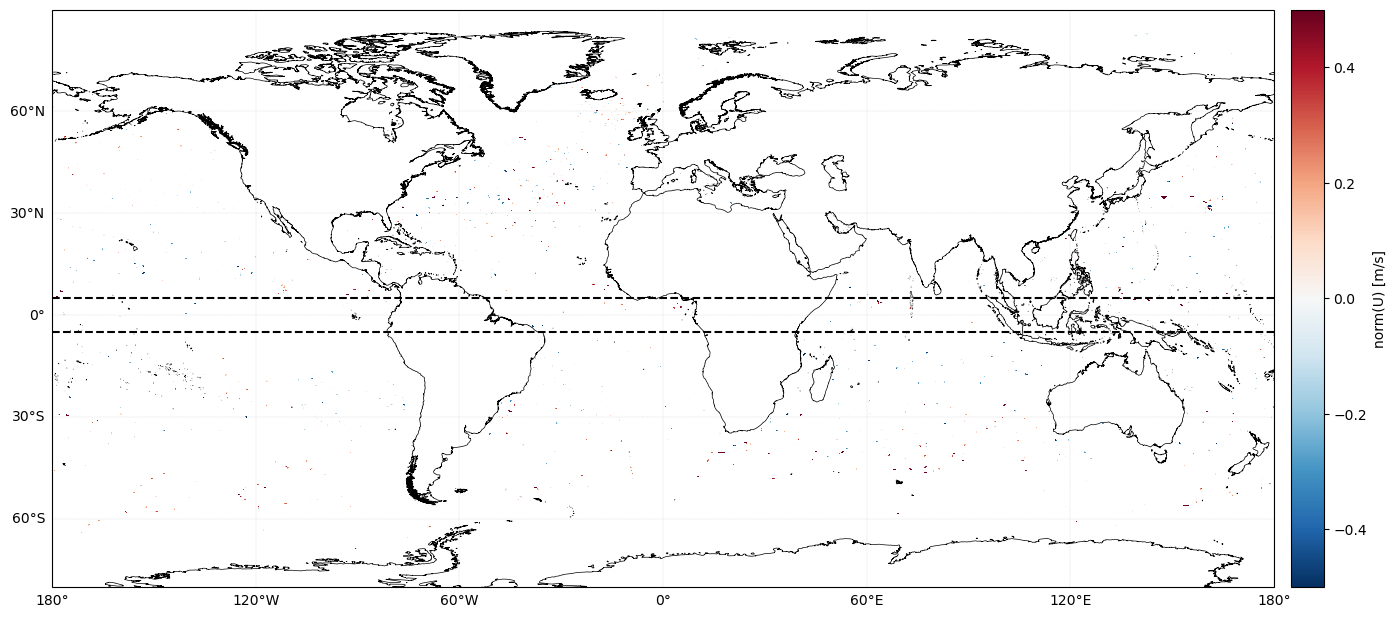

In [82]:
plot_uv_map(res_data.u_drifter[-100],res_data.lon,res_data.lat,vmin=-0.5,vmax=0.5)